
# Machine Learning

## Assignment 1:

#### Einav Diar 
#### ID Number: 319010807

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Load the data
data = pd.read_csv('sample.csv')

# X and Y definition
x = data['x'].values
y = data['y'].values

data

,x,y
0,0.000000,0.066234
1,0.058622,4.755240
2,0.117245,12.807588
3,0.175867,30.280596
4,0.234489,9.084502
...,...,...
2043,119.765511,637.325384
2044,119.824133,641.601897
2045,119.882755,642.385849
2046,119.941378,646.645136


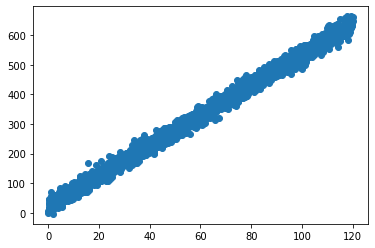

In [3]:
#plot the dataset:
plt.scatter(x=data['x'], y=data['y'])

As you can see, the plot shows a linear relationship between x and y variables.

In [4]:
learning_rate = [0.0001, 0.1]
epochs = 1000

### Implement the Gradient Descent:

In [5]:
def gradient_descent(x,y,learning_rate):
    m=0
    c=0
    n = len(x)
    results_gd = pd.DataFrame({'m': [], 'c': [],'loss':[], 'epochs': []})
    for i in range(epochs):
        y_pred = m*x + c
        loss = (1/n) * sum([val**2 for val in (y-y_pred)])
        gradient_m = -(2/n) * sum(x * (y - y_pred))
        gradient_c = -(2/n) * sum(y - y_pred)
        m = m - (learning_rate * gradient_m)
        c = c - (learning_rate * gradient_c)
        results_gd.loc[i] = [m, c,loss, i]      
    return results_gd  

###### Learning rate = 0.0001

In [6]:
gd=gradient_descent(x,y,learning_rate[0])
gd.tail(1)

,m,c,loss,epochs
999,5.402721,1.256613,376.775879,999.0


Text(0.5, 1.0, 'c in each epoch')

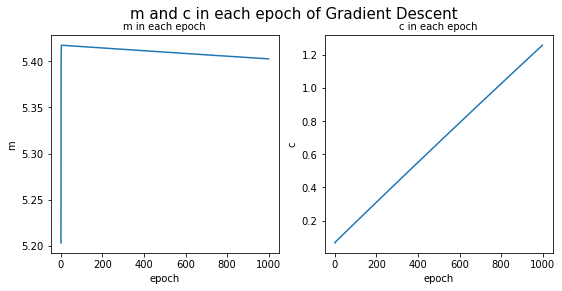

In [7]:
fig, ax = plt.subplots(1, 2,figsize = (9,4))
ax[0].plot(gd['epochs'],gd['m'])
ax[1].plot(gd['epochs'],gd['c'])

fig.suptitle('m and c in each epoch of Gradient Descent',fontsize = 15)
ax[0].set_ylabel("m")
ax[1].set_ylabel("c")
ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")
ax[0].set_title('m in each epoch', fontsize=10)
ax[1].set_title('c in each epoch', fontsize=10)

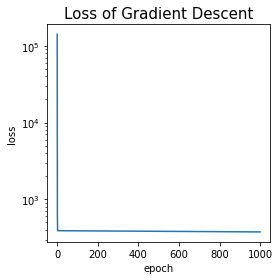

In [8]:
fig, ax = plt.subplots(figsize = (4,4))
plt.plot(gd['epochs'],gd['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
ax.set_yscale('log')
plt.title('Loss of Gradient Descent',fontsize = 15)
plt.show()

###### Learning rate = 0.1

In [9]:
gd1=gradient_descent(x,y,learning_rate[1])
gd1.tail(1)

C:\Users\einav\AppData\Local\Temp/ipykernel_5096/4173154.py:8: RuntimeWarning: overflow encountered in double_scalars
  loss = (1/n) * sum([val**2 for val in (y-y_pred)])
C:\Users\einav\AppData\Local\Temp/ipykernel_5096/4173154.py:9: RuntimeWarning: overflow encountered in double_scalars
  gradient_m = -(2/n) * sum(x * (y - y_pred))
C:\Users\einav\AppData\Local\Temp/ipykernel_5096/4173154.py:7: RuntimeWarning: invalid value encountered in multiply
  y_pred = m*x + c


,m,c,loss,epochs
999,NaN,NaN,NaN,999.0


Text(0.5, 1.0, 'c in each epoch')

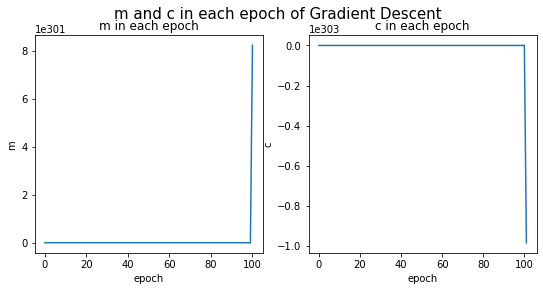

In [10]:
fig, ax = plt.subplots(1, 2,figsize = (9,4))
ax[0].plot(gd1['epochs'],gd1['m'])
ax[1].plot(gd1['epochs'],gd1['c'])
fig.suptitle('m and c in each epoch of Gradient Descent',fontsize = 15)
ax[0].set_ylabel("m")
ax[1].set_ylabel("c")
ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")
ax[0].set_title('m in each epoch')
ax[1].set_title('c in each epoch')

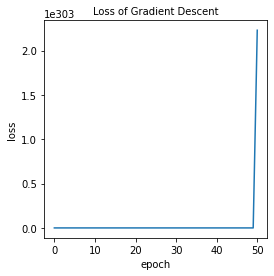

In [11]:
fig, ax = plt.subplots(figsize = (4,4))
plt.plot(gd1['epochs'],gd1['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss of Gradient Descent',fontsize = 10)
plt.show()

### Implement the Stochastic Gradient Descent:

In [12]:
def stochastic_gradient_descent(x, y, learning_rate):
    a=0
    b=0
    n = len(x)
    results_sgd = pd.DataFrame({'a': [], 'b': [],'loss':[], 'epochs': []})
    for i in range(epochs):
        random = np.random.randint(n)
        xi = x[random]
        yi = y[random]
        y_pred = a*xi + b
        loss = (1/n) * sum([val**2 for val in (y-y_pred)])
        gradient_a = -(2/n) * xi * (yi - y_pred)
        gradient_b = -(2/n) * (yi - y_pred)
        a = a - (learning_rate * gradient_a)
        b = b - (learning_rate * gradient_b)
        results_sgd.loc[i] = [a, b,loss, i]
    return results_sgd

###### Learning rate = 0.0001

In [13]:
sgd=stochastic_gradient_descent(x,y,learning_rate[0])
sgd.tail(1)

,a,b,loss,epochs
999,1.995478,0.025696,46149.809439,999.0


Text(0.5, 1.0, 'b in each epoch')

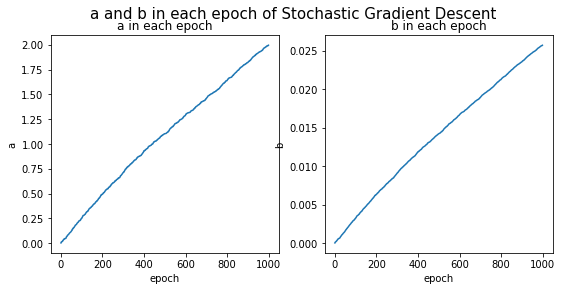

In [14]:
fig, ax = plt.subplots(1, 2,figsize = (9,4))
ax[0].plot(sgd['epochs'],sgd['a'])
ax[1].plot(sgd['epochs'],sgd['b'])
fig.suptitle('a and b in each epoch of Stochastic Gradient Descent',fontsize = 15)
ax[0].set_ylabel("a")
ax[1].set_ylabel("b")
ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")
ax[0].set_title('a in each epoch')
ax[1].set_title('b in each epoch')

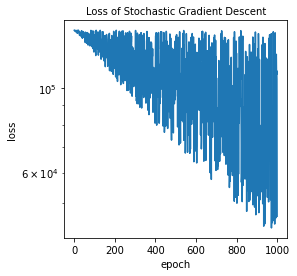

In [15]:
fig, ax = plt.subplots(figsize = (4,4))
plt.plot(sgd['epochs'],sgd['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
ax.set_yscale('log')
plt.title('Loss of Stochastic Gradient Descent',fontsize = 10)
plt.show()

###### Learning rate = 0.1

In [16]:
sgd1=stochastic_gradient_descent(x,y,learning_rate[1])
sgd1.tail(1)

,a,b,loss,epochs
999,5.438111,0.60002,40250.548908,999.0


Text(0.5, 1.0, 'b in each epoch')

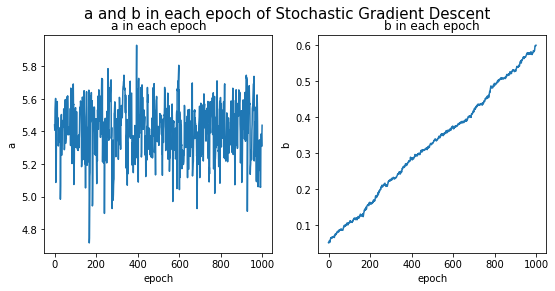

In [17]:
fig, ax = plt.subplots(1, 2,figsize = (9,4))
ax[0].plot(sgd1['epochs'],sgd1['a'])
ax[1].plot(sgd1['epochs'],sgd1['b'])
fig.suptitle('a and b in each epoch of Stochastic Gradient Descent',fontsize = 15)
ax[0].set_ylabel("a")
ax[1].set_ylabel("b")
ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")
ax[0].set_title('a in each epoch')
ax[1].set_title('b in each epoch')

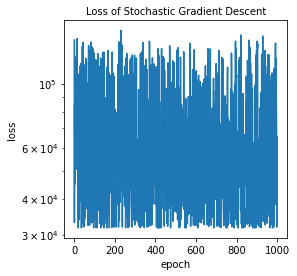

In [18]:
fig, ax = plt.subplots(figsize = (4,4))
plt.plot(sgd1['epochs'],sgd1['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
ax.set_yscale('log')
plt.title('Loss of Stochastic Gradient Descent',fontsize = 10)
plt.show()

### Implement the Mini-Batch Gradient Descent:

In [19]:
def mini_batch_gradient_descent(x, y,learning_rate):
    batch_size = 10
    a=0
    b=0
    n = len(x)
    results_mbgd = pd.DataFrame({'a': [], 'b': [],'loss':[], 'epochs': []})
   # for i in range(0, n, batch_size):
    for i in range(epochs):
        random = np.random.randint(n)
        x_batch = x[random:random+batch_size]
        y_batch = y[random:random+batch_size]
        y_pred = a*x_batch + b
        loss = (1/n) * sum([val**2 for val in (y_batch-y_pred)])
        gradient_a = -(2/batch_size) * np.sum(x_batch * (y_batch - y_pred))
        gradient_b = -(2/batch_size) * np.sum(y_batch - y_pred)
        a = a - learning_rate * gradient_a
        b = b - learning_rate * gradient_b
        results_mbgd.loc[i] = [a, b,loss, i]      
    return results_mbgd

###### Learning rate = 0.0001

In [20]:
mbgd=mini_batch_gradient_descent(x,y,learning_rate[0])
mbgd.tail(1)

,a,b,loss,epochs
999,5.321464,1.356012,0.902624,999.0


Text(0.5, 1.0, 'b in each epoch')

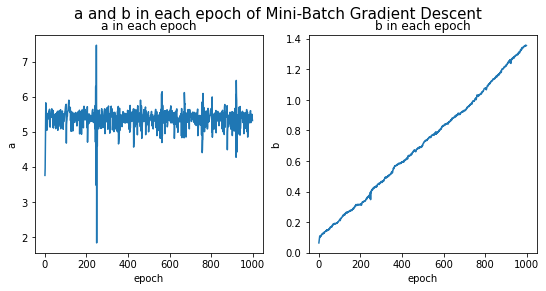

In [21]:
fig, ax = plt.subplots(1, 2,figsize = (9,4))
ax[0].plot(mbgd['epochs'],mbgd['a'])
ax[1].plot(mbgd['epochs'],mbgd['b'])
fig.suptitle('a and b in each epoch of Mini-Batch Gradient Descent',fontsize = 15)
ax[0].set_ylabel("a")
ax[1].set_ylabel("b")
ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")
ax[0].set_title('a in each epoch')
ax[1].set_title('b in each epoch')

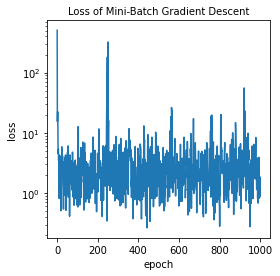

In [22]:
fig, ax = plt.subplots(figsize = (4,4))
plt.plot(mbgd['epochs'],mbgd['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
ax.set_yscale('log')
plt.title('Loss of Mini-Batch Gradient Descent',fontsize = 10)
plt.show()

###### Learning rate = 0.1

In [23]:
mbgd1=mini_batch_gradient_descent(x,y,learning_rate[1])
mbgd1.tail(1)

C:\Users\einav\AppData\Local\Temp/ipykernel_5096/1243302558.py:13: RuntimeWarning: overflow encountered in double_scalars
  loss = (1/n) * sum([val**2 for val in (y_batch-y_pred)])
C:\Users\einav\AppData\Local\Temp/ipykernel_5096/1243302558.py:14: RuntimeWarning: overflow encountered in multiply
  gradient_a = -(2/batch_size) * np.sum(x_batch * (y_batch - y_pred))
C:\Users\einav\AppData\Local\Temp/ipykernel_5096/1243302558.py:16: RuntimeWarning: invalid value encountered in double_scalars
  a = a - learning_rate * gradient_a


,a,b,loss,epochs
999,NaN,NaN,NaN,999.0


Text(0.5, 1.0, 'b in each epoch')

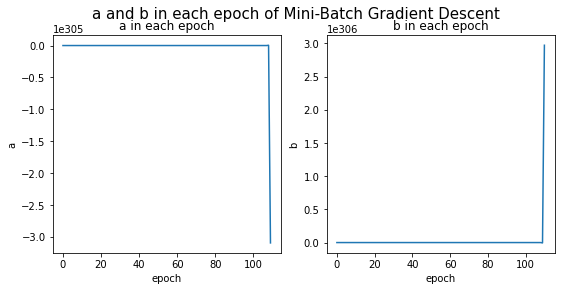

In [24]:
fig, ax = plt.subplots(1, 2,figsize = (9,4))
ax[0].plot(mbgd1['epochs'],mbgd1['a'])
ax[1].plot(mbgd1['epochs'],mbgd1['b'])
fig.suptitle('a and b in each epoch of Mini-Batch Gradient Descent',fontsize = 15)
ax[0].set_ylabel("a")
ax[1].set_ylabel("b")
ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")
ax[0].set_title('a in each epoch')
ax[1].set_title('b in each epoch')

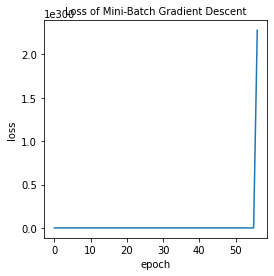

In [25]:
fig, ax = plt.subplots(figsize = (4,4))
plt.plot(mbgd1['epochs'],mbgd1['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss of Mini-Batch Gradient Descent',fontsize = 10)
plt.show()